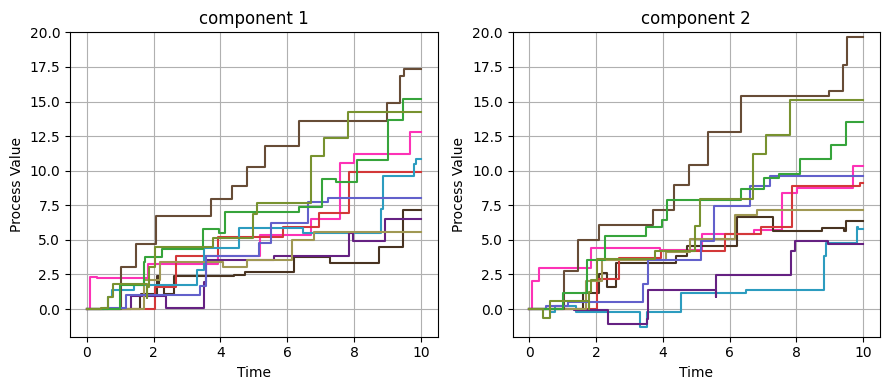

In [85]:
import numpy as np
import matplotlib.pyplot as plt

def compound_poisson_process(lam, T, mu, sigma, rho):
    N = np.random.poisson(lam * T)
    t = np.random.uniform(0, T, N)
    t = np.sort(t)
    cov = [[sigma[0]**2, rho*sigma[0]*sigma[1]], [rho*sigma[0]*sigma[1], sigma[1]**2]]
    J = np.random.multivariate_normal(mu, cov, N)
    J = np.cumsum(J, axis=0)
    t = np.insert(t, 0, 0)
    J = np.vstack((np.zeros(2), J))
    t = np.append(t, T)
    J = np.vstack((J, J[-1, :]))
    return t, J

# Parameters
lam = 1  # intensity of the Poisson process
T = 10   # time horizon
mu = [1, 1]  # mean of jump sizes
sigma = [1, 1]  # standard deviation of jump sizes
rho = 0.7  # correlation coefficient
np.random.seed(54)

fig, axs = plt.subplots(1, 2, sharex=True, figsize=(9, 4))

for _ in range(10):
    # Simulate the process
    t, J = compound_poisson_process(lam, T, mu, sigma, rho)
    color = np.random.rand(3,)  # Generate random RGB values
    axs[0].step(t, J[:, 0], where='post', color=color)
    axs[1].step(t, J[:, 1], where='post', color=color)

axs[0].set_title('component 1')
axs[1].set_title('component 2')
for ax in axs:
    ax.set_xlabel('Time')
    ax.set_ylabel('Process Value')
    ax.set_ylim(-2, 20)  
    ax.grid(True)

plt.tight_layout()
plt.show()

In [87]:
print(J[-1, :])

[14.25622846 15.09906806]


In [91]:
compound_poisson_process(lam, T, mu, sigma, rho)[1][-1,:]

array([7.86573469, 4.89409701])

In [229]:
import pandas as pd
# Parameters
lam = 1  # intensity of the Poisson process
T = 100   # time horizon
mu = [1, 1]  # mean of jump sizes
sigma = [1, 1]  # standard deviation of jump sizes
rho = -0.7  # correlation coefficient
nsim = 10**3
np.random.seed(54)
df = pd.DataFrame([compound_poisson_process(lam, T, mu, sigma, rho)[1][-1,:] for _ in range(nsim)])
# print(df)
print(df.cov())
print(df.mean())

            0           1
0  177.401932   32.293703
1   32.293703  205.564009
0     99.581885
1    100.271635
dtype: float64


In [227]:
def v(j,k):
    cov = [[sigma[0]**2, rho*sigma[0]*sigma[1]], [rho*sigma[0]*sigma[1], sigma[1]**2]]
    J = np.random.multivariate_normal(mu, cov, nsim)
    return T*np.mean(J[:,j] * J[:,k])
print(v(0,1))

35.37246254875833


formula 25.8 in Sato is right